In [1819]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Movement types (these do NOT contain dx/dy)
MOVE_ACTIONS = [
    "PURSUIT_FOOD",
    "RUN_FROM_PREDATOR",
    "TOWARD_PREDATOR"
]

FOOD_ACTIONS = ["REPRODUCE", "ACTIVATE_SPECIAL", "IDLE_FOOD"]

ACTION_COUNT = len(MOVE_ACTIONS) * len(FOOD_ACTIONS)


def decode_action(idx):
    move_idx = idx // len(FOOD_ACTIONS)
    food_idx = idx % len(FOOD_ACTIONS)
    return MOVE_ACTIONS[move_idx], FOOD_ACTIONS[food_idx]
import os
import json
import re
import pandas as pd

# Folder containing log files
LOG_DIR = "./training_logs"   # change this if needed

# Regex to match your filenames
pattern = re.compile(r"episode_(\d+)_(\d+)(\.json)?$")

rows = []

for fname in os.listdir(LOG_DIR):
    match = pattern.match(fname)
    if not match:
        continue

    episode_num = int(match.group(1))
    timestamp = int(match.group(2))

    full_path = os.path.join(LOG_DIR, fname)

    with open(full_path, "r") as f:
        data = json.load(f)

    stats = data["stats"]
        
    # Extract meta
    meta = data['meta']
    recent_avg_return = meta['recent_avg_return']
    epsilon = meta['epsilon']

    # Decode q_summary, converting string keys to tuple keys
    q_summary_raw = meta['q_summary']
    q_summary = {}
    for key_str, values in q_summary_raw.items():
        # Convert string "(x, y, z)" to tuple (x, y, z)
        key_tuple = tuple(float(x) for x in key_str.strip('()').split(','))
        q_summary[key_tuple] = values

    # Flatten action counts: action_0, action_1, ...
    action_counts = stats["action_counts"]
    action_dict = {f"action_{i}": action_counts[i] for i in range(len(action_counts))}

    # Flatten state_visits (optional: leave as dict or expand to columns)
    state_visits = stats["state_visits"]

    row = {
        "filename": fname,
        "episode": data["episode"],
        "timestamp": data["timestamp"],
        "iso": data["iso"],
        "games_in_episode": data["games_in_episode"],
        "total_messages": stats["total_messages"],
        "total_updates": stats["total_updates"],
        "total_reward": stats["total_reward"],
        "state_visits": state_visits,  # keep as dict for now
        "state_action_prob_sums": stats['state_action_prob_sums'],
        "recent_avg_return": recent_avg_return,
        "epsilon": epsilon,
        "q_summary": q_summary
    }

    # merge dictionaries
    row.update(action_dict)

    rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)

print(df.head())
print("\nTotal logs parsed:", len(df))


                     filename  episode   timestamp                   iso  \
0  episode_10_1764135739.json       10  1764135739  2025-11-26T05:42:19Z   
1  episode_11_1764135924.json       11  1764135924  2025-11-26T05:45:24Z   
2  episode_12_1764136139.json       12  1764136139  2025-11-26T05:48:59Z   
3  episode_13_1764136353.json       13  1764136353  2025-11-26T05:52:33Z   
4  episode_14_1764136572.json       14  1764136572  2025-11-26T05:56:12Z   

   games_in_episode  total_messages  total_updates  total_reward  \
0                10           48716          48461     -1895.475   
1                10           47254          47009     -2601.775   
2                10           54523          54233     -2451.175   
3                10           56825          56520       754.000   
4                10           58477          58178      -221.550   

                                        state_visits  \
0  {'(3, 1, 300.0)': 70, '(3, 1, 200.0)': 53, '(3...   
1  {'(3, 0, 300.0)': 1

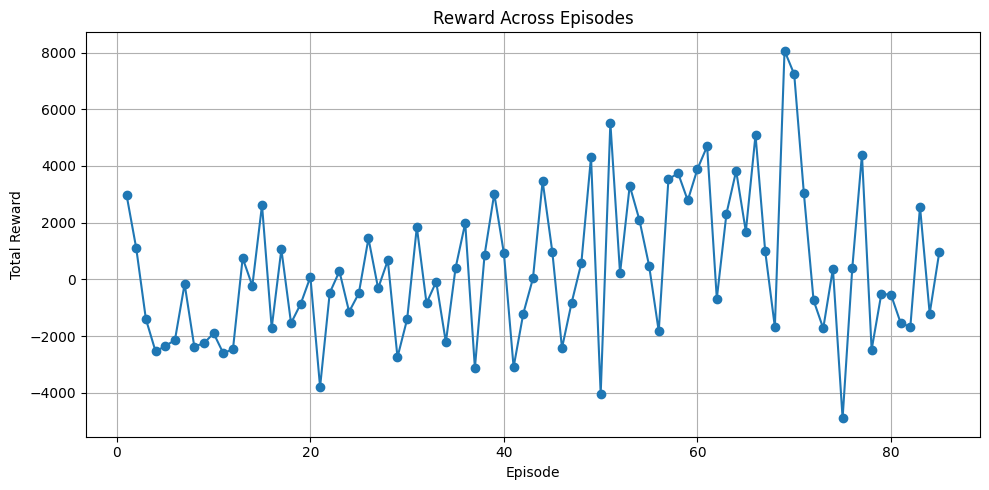

In [1820]:
import matplotlib.pyplot as plt

# df must contain: df["episode"], df["total_reward"]
df_sorted = df.sort_values("episode")

plt.figure(figsize=(10, 5))
plt.plot(df_sorted["episode"], df_sorted["total_reward"], marker="o")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward Across Episodes")
plt.grid(True)
plt.tight_layout()
plt.show()


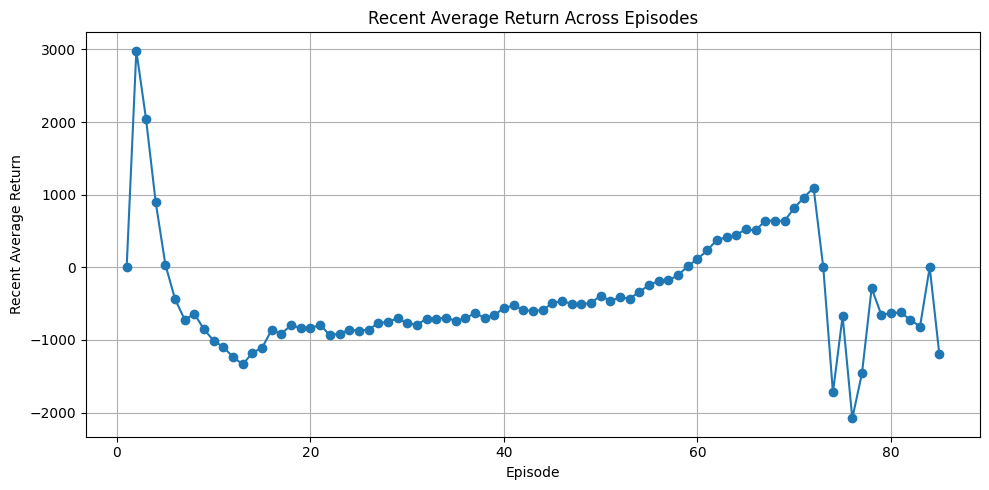

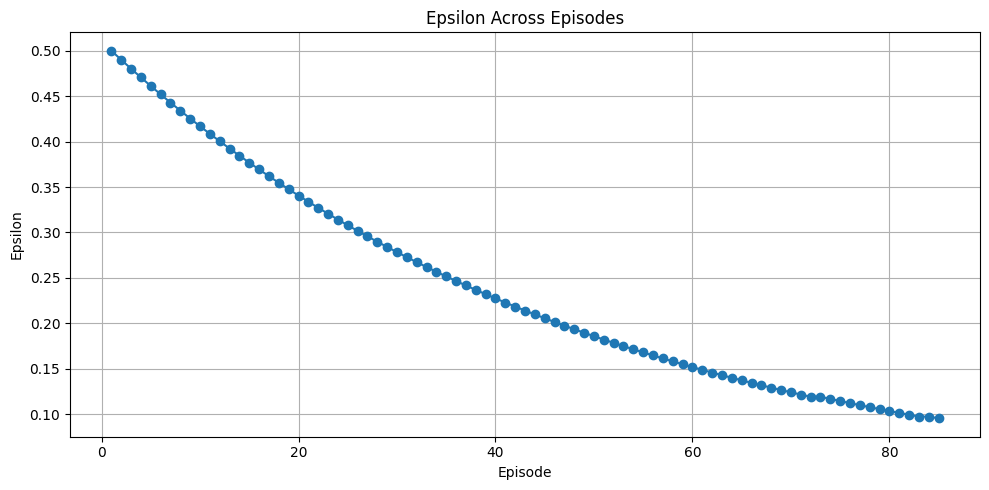

In [1821]:

# df must contain: df["episode"], df["total_reward"]
df_sorted = df.sort_values("episode")

plt.figure(figsize=(10, 5))
plt.plot(df_sorted["episode"], df_sorted["recent_avg_return"], marker="o")
plt.xlabel("Episode")
plt.ylabel("Recent Average Return")
plt.title("Recent Average Return Across Episodes")
plt.grid(True)
plt.tight_layout()
plt.show()


# df must contain: df["episode"], df["total_reward"]
df_sorted = df.sort_values("episode")

plt.figure(figsize=(10, 5))
plt.plot(df_sorted["episode"], df_sorted["epsilon"], marker="o")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Epsilon Across Episodes")
plt.grid(True)
plt.tight_layout()
plt.show()


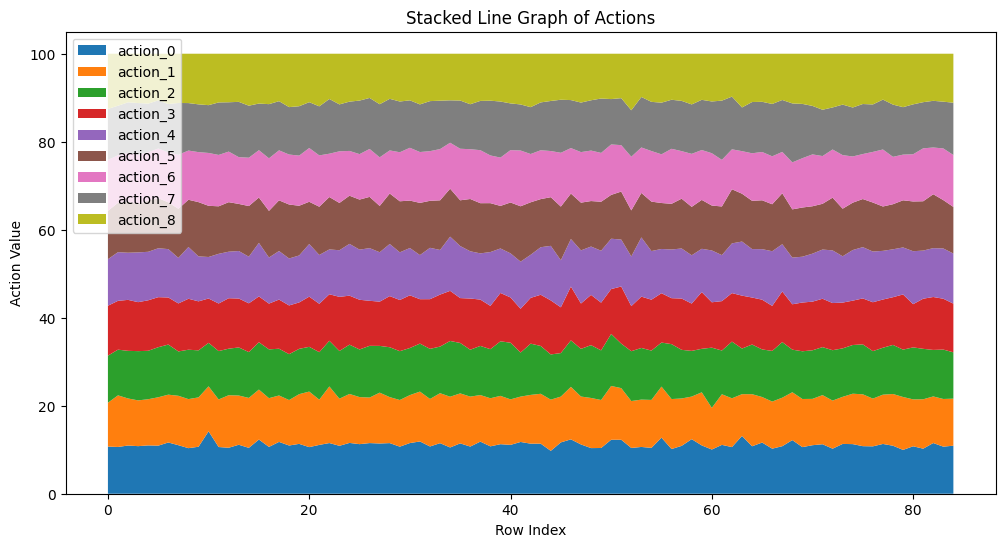

    (3, 1, 300.0)  (3, 1, 200.0)  (3, 0, 300.0)  (3, 0, 100.0)  (3, 1, 100.0)  \
0        0.144446       0.109366       0.243495       0.082541       0.033016   
1        0.082963       0.085090       0.350997       0.076581       0.059563   
2        0.154887       0.086663       0.300555       0.062692       0.092195   
3        0.130927       0.132696       0.217622       0.106157       0.065464   
4        0.192513       0.065317       0.226890       0.037815       0.056722   
..            ...            ...            ...            ...            ...   
80       0.134188       0.205755       0.293723       0.150589       0.050693   
81       0.171059       0.123637       0.287921       0.138879       0.099925   
82       0.101804       0.191805       0.402792       0.042787       0.073771   
83       0.080424       0.102001       0.225579       0.094155       0.049039   
84       0.120050       0.116178       0.245910       0.046471       0.052280   

    (1, 1, 200.0)  (1, 0, 3

C:\Users\huynh\AppData\Local\Temp\ipykernel_2676\2917780514.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


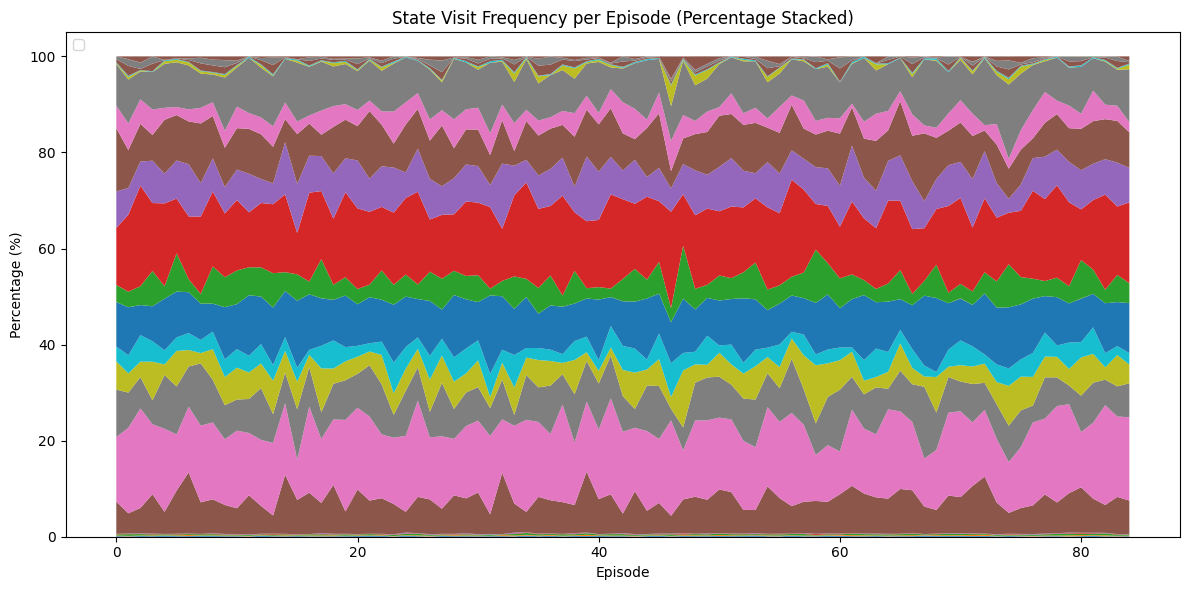

In [1822]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
# Assume df is your dataframe

# -----------------------------
# 1. ACTIONS (percentage stacked)
# -----------------------------
action_cols = [col for col in df.columns if col.startswith("action_")]

# Normalize each row to percentages
action_pct = df[action_cols].div(df[action_cols].sum(axis=1), axis=0) * 100

# Create stacked line (area) plot
plt.figure(figsize=(12, 6))
plt.stackplot(action_pct.index, action_pct.T, labels=action_pct.columns)
plt.legend(loc='upper left')
plt.title("Stacked Line Graph of Actions")
plt.xlabel("Row Index")
plt.ylabel("Action Value")
plt.show()
# -----------------------------
# 2. STATE VISITS (percentage stacked)
# -----------------------------
# Convert state_visits column (dicts) into a DataFrame
state_df = pd.DataFrame(df["state_visits"].tolist()).fillna(0)

# Normalize each row to percentages
state_pct = state_df.div(state_df.sum(axis=1), axis=0) * 100
print(state_pct)
plt.figure(figsize=(12, 6))
plt.stackplot(state_pct.index, state_pct.T)
plt.title("State Visit Frequency per Episode (Percentage Stacked)")
plt.xlabel("Episode")
plt.ylabel("Percentage (%)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


In [1823]:
# --- decoding functions already given ---
MOVE_ACTIONS = [
    "PURSUIT_FOOD",
    "RUN_FROM_PREDATOR",
    "TOWARD_PREDATOR"
]

FOOD_ACTIONS = ["REPRODUCE", "ACTIVATE_SPECIAL", "IDLE_FOOD"]

ACTION_COUNT = len(MOVE_ACTIONS) * len(FOOD_ACTIONS)

def decode_action(idx):
    move_idx = idx // len(FOOD_ACTIONS)
    food_idx = idx % len(FOOD_ACTIONS)
    return MOVE_ACTIONS[move_idx], FOOD_ACTIONS[food_idx]
def sort_tuples(lst):
    """
    Sort a list of tuples by first element, then second, then third.
    """
    return sorted(lst, key=lambda x: (x[0], x[1], x[2]))

# -----------------------------------------------------
#   MAKE A FUNCTION THAT TAKES FRAME INDEX
# -----------------------------------------------------
def plot_heatmap_frame(df, frame_idx, show_numbers=False):
    """
    Plot state–action heatmap for a specific frame index.
    df: your dataframe
    frame_idx: row index into df
    show_numbers: whether to annotate heatmap values
    """
    
    # Extract dictionary for that frame
    d = df.loc[df["episode"] == frame_idx, "q_summary"].iloc[0]  # now a dict

    # Convert dictionary → DataFrame (rows = states, columns = action_0..N)
    heatmap_df = pd.DataFrame.from_dict(d, orient='index')
    states_list = list(heatmap_df.index)
    sorted_states = sort_tuples(states_list)  # using the sort_tuples function from before

    # Reindex the DataFrame with sorted rows
    heatmap_df = heatmap_df.loc[sorted_states]
    # Replace column names with decoded labels
    decoded_names = [
        f"{decode_action(i)[0]}\n{decode_action(i)[1]}" 
        for i in range(heatmap_df.shape[1])
    ]
    heatmap_df.columns = decoded_names

    plt.figure(figsize=(16, 10))
    sns.heatmap(
        heatmap_df,
        cmap="viridis",
        annot=show_numbers,
        fmt=".2f"
    )

    plt.title(f"State–Action Heatmap | Frame {frame_idx}")
    plt.xlabel("Decoded Action")
    plt.ylabel("State")
    plt.tight_layout()
    plt.show()


In [1824]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_actionprobs(df, frame_idx, show_numbers=False):
    """
    Plot state–action heatmap for a specific frame index.
    
    df: your dataframe
    frame_idx: row index into df
    show_numbers: whether to annotate heatmap values
    """
    
    # Extract dictionary for that frame
    d = df.loc[df["episode"] == frame_idx, "q_summary"].iloc[0]  # dict
    
    # Convert dictionary → DataFrame (rows = states, columns = action_0..N)
    heatmap_df = pd.DataFrame.from_dict(d, orient='index')
    
    # Sort states
    sorted_states = sort_tuples(list(heatmap_df.index))
    heatmap_df = heatmap_df.loc[sorted_states]
    
    # Scale each column independently
    scaler = RobustScaler()
    heatmap_scaled = pd.DataFrame(index=heatmap_df.index)
    for action in heatmap_df.columns:
        # fit_transform expects 2D array
        heatmap_scaled[action] = scaler.fit_transform(heatmap_df[[action]])
    
    # Replace column names with decoded labels
    decoded_names = [
        f"{decode_action(i)[0]}\n{decode_action(i)[1]}" 
        for i in range(heatmap_df.shape[1])
    ]
    heatmap_scaled.columns = decoded_names

    # Plot heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(
        heatmap_scaled,
        cmap="viridis",
        annot=show_numbers,
        fmt=".2f"
    )
    plt.title(f"State–Action Heatmap | Frame {frame_idx}")
    plt.xlabel("Decoded Action")
    plt.ylabel("State")
    plt.tight_layout()
    plt.show()



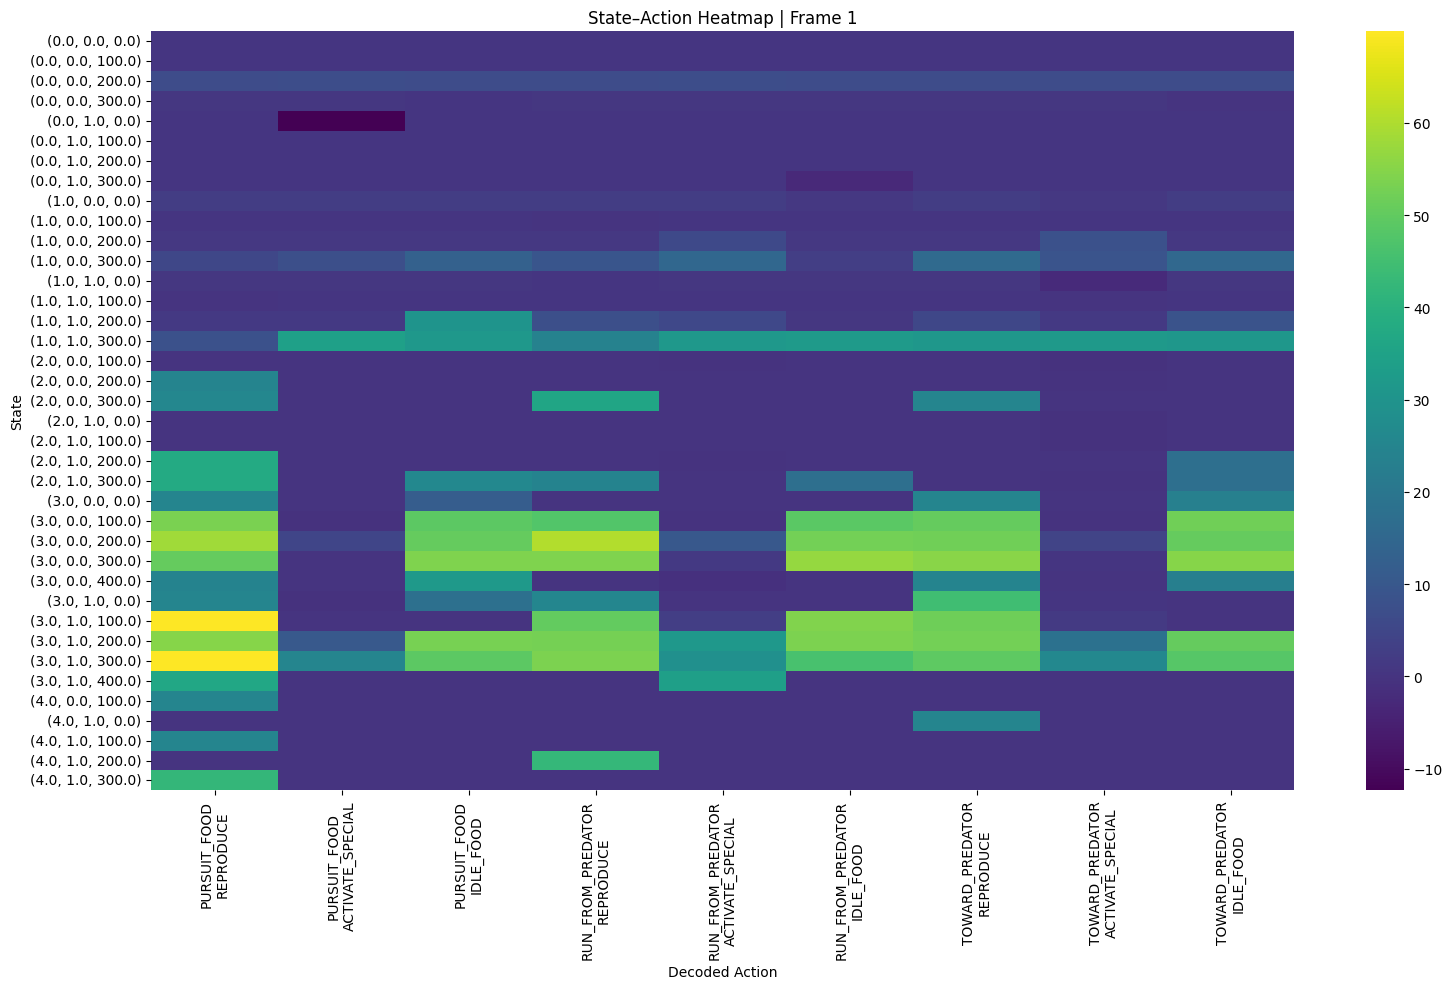

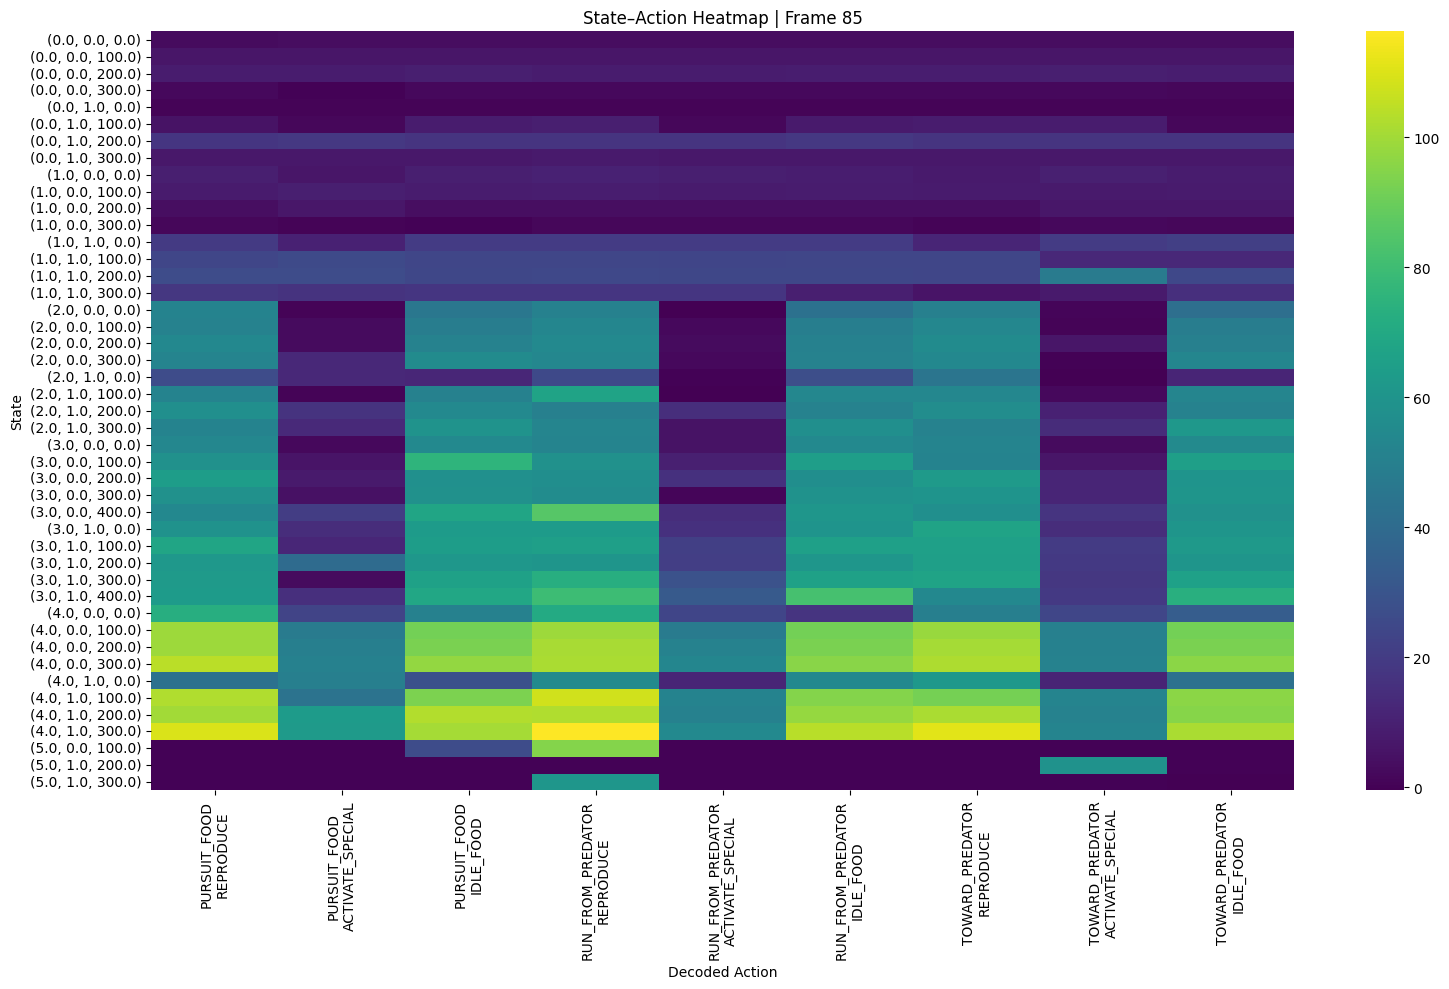

In [1825]:
plot_heatmap_frame(df, frame_idx=1, show_numbers=False)  # first frame
plot_heatmap_frame(df, frame_idx=len(df), show_numbers=False)  # last frame

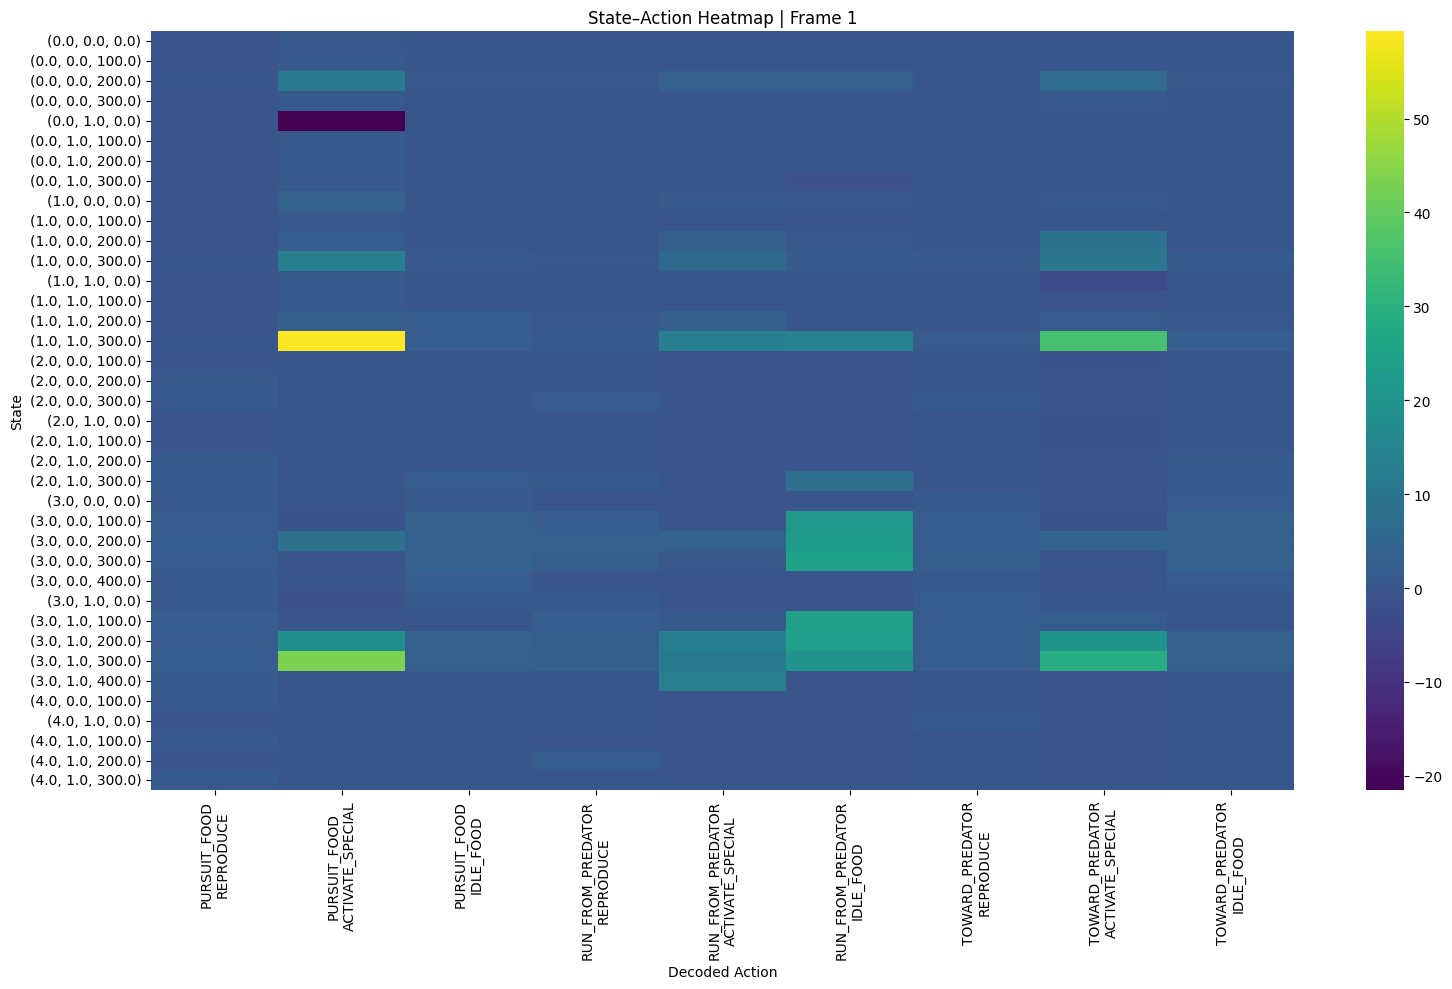

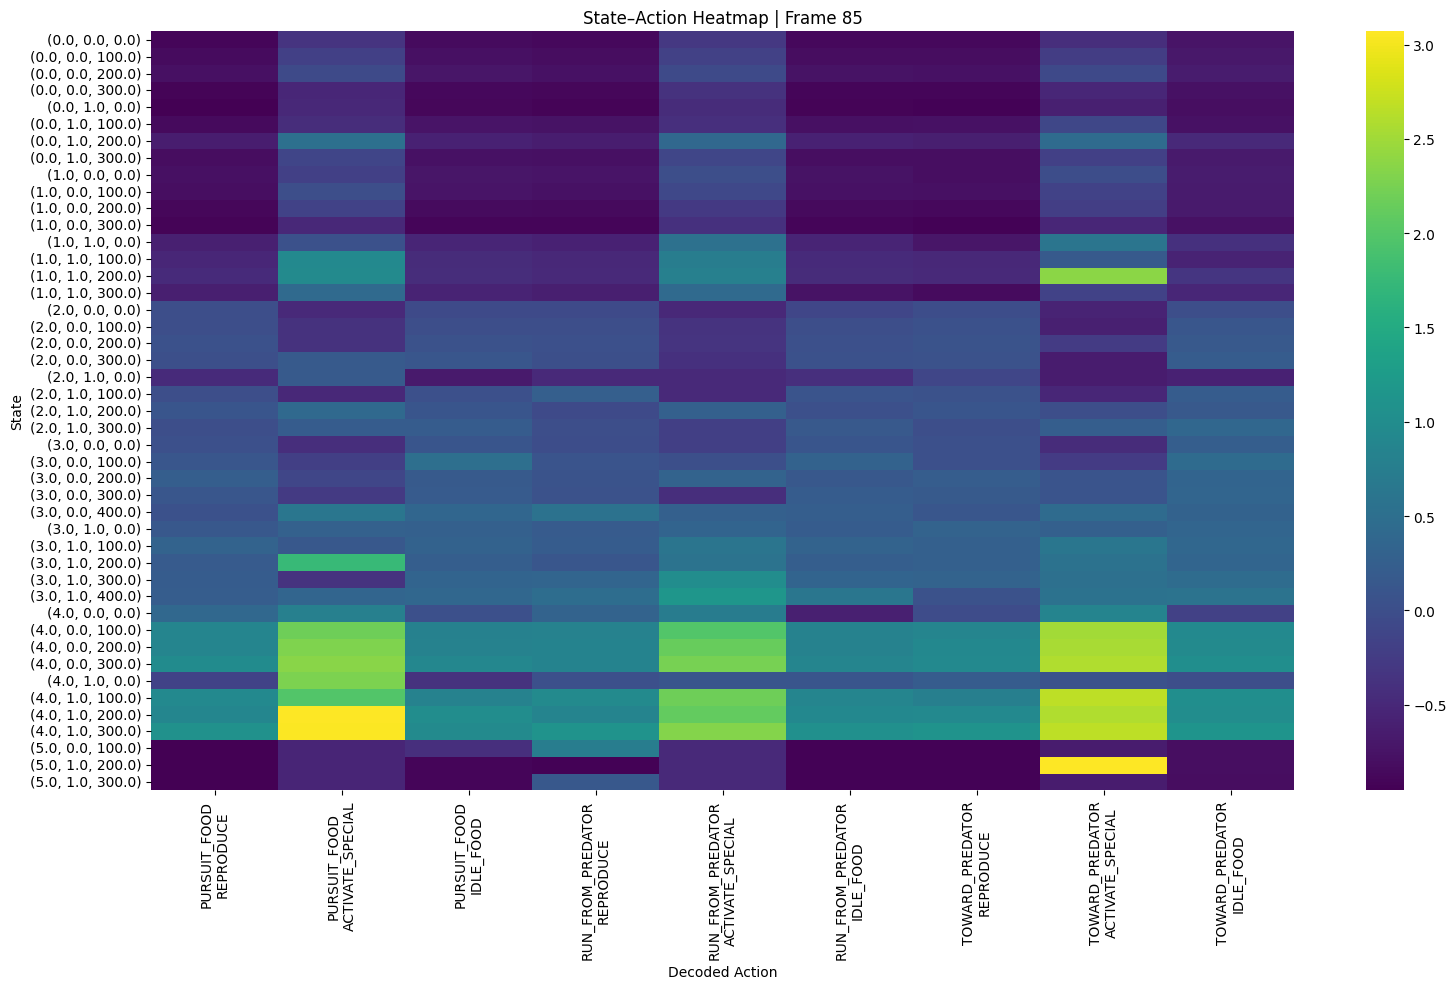

66


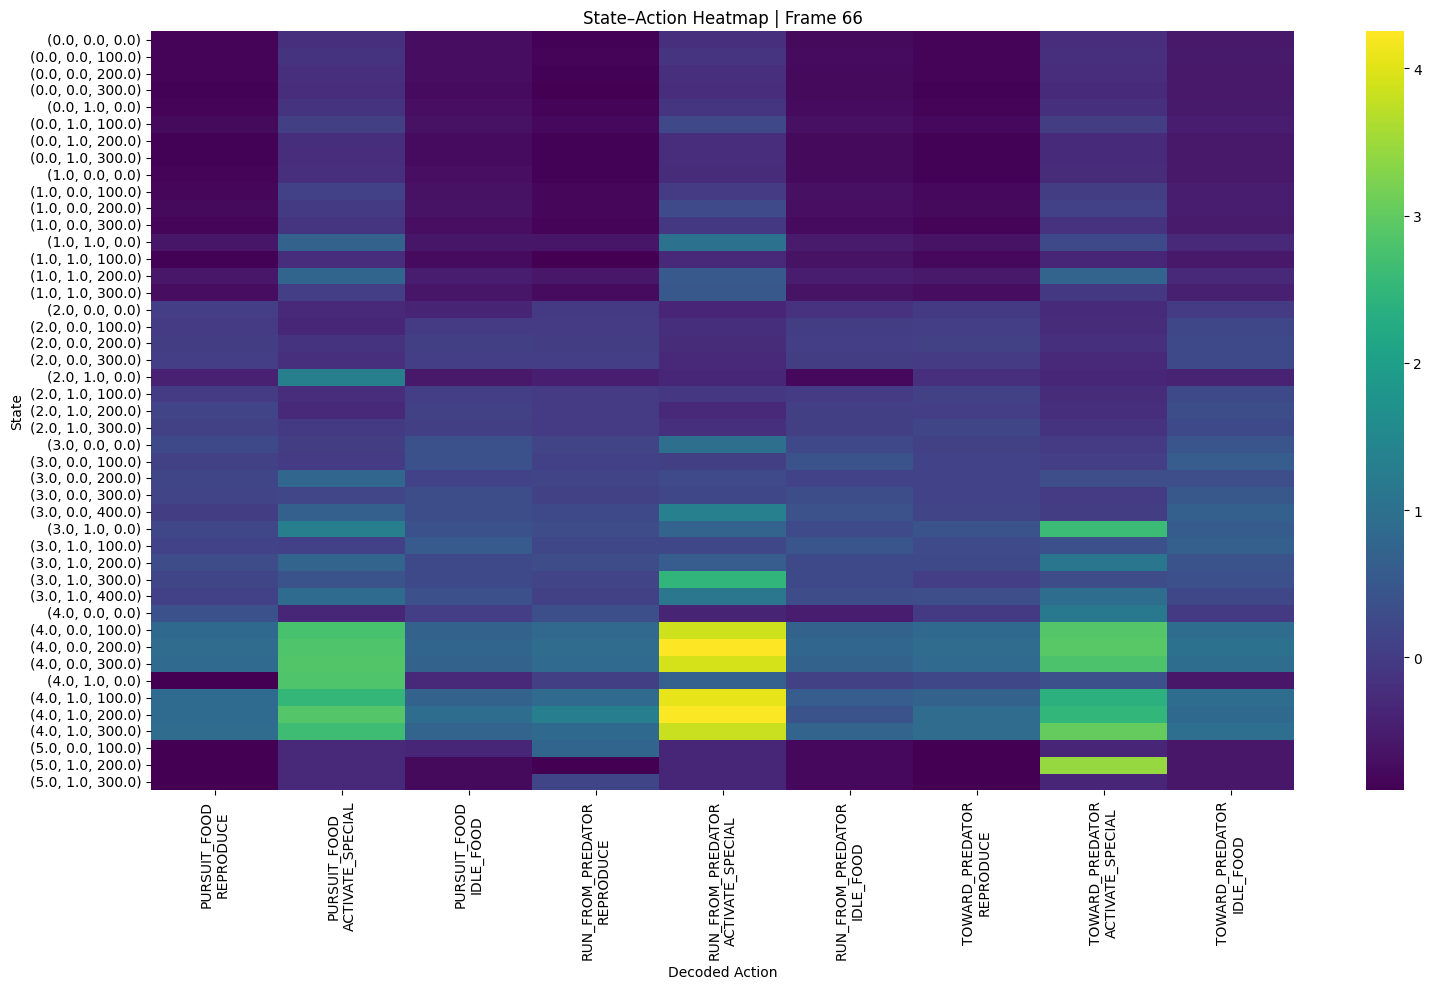

67


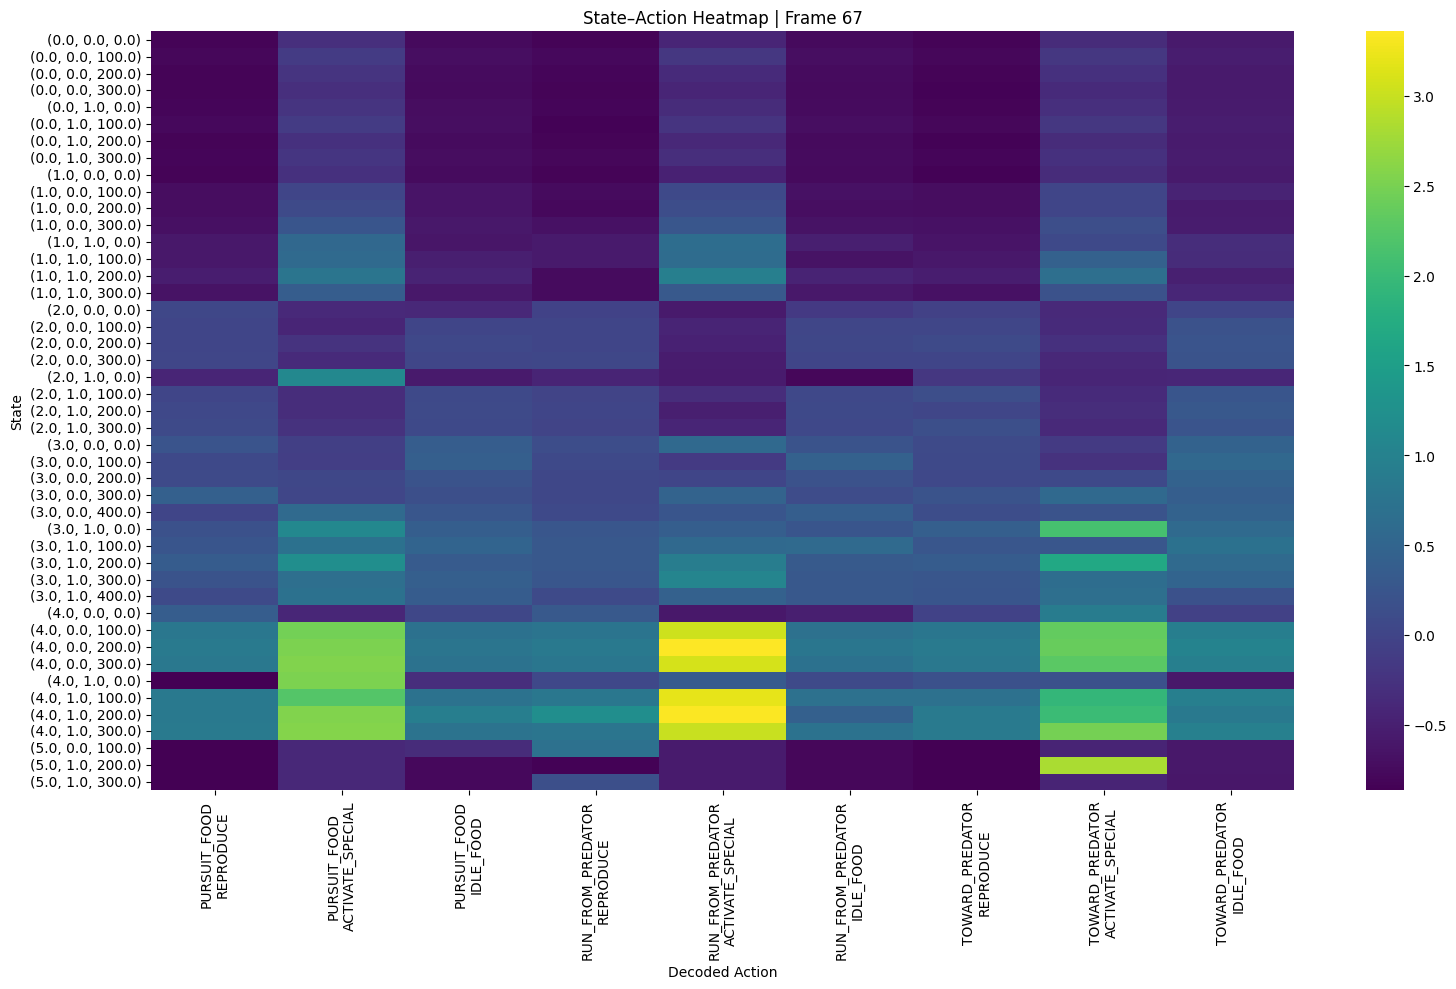

68


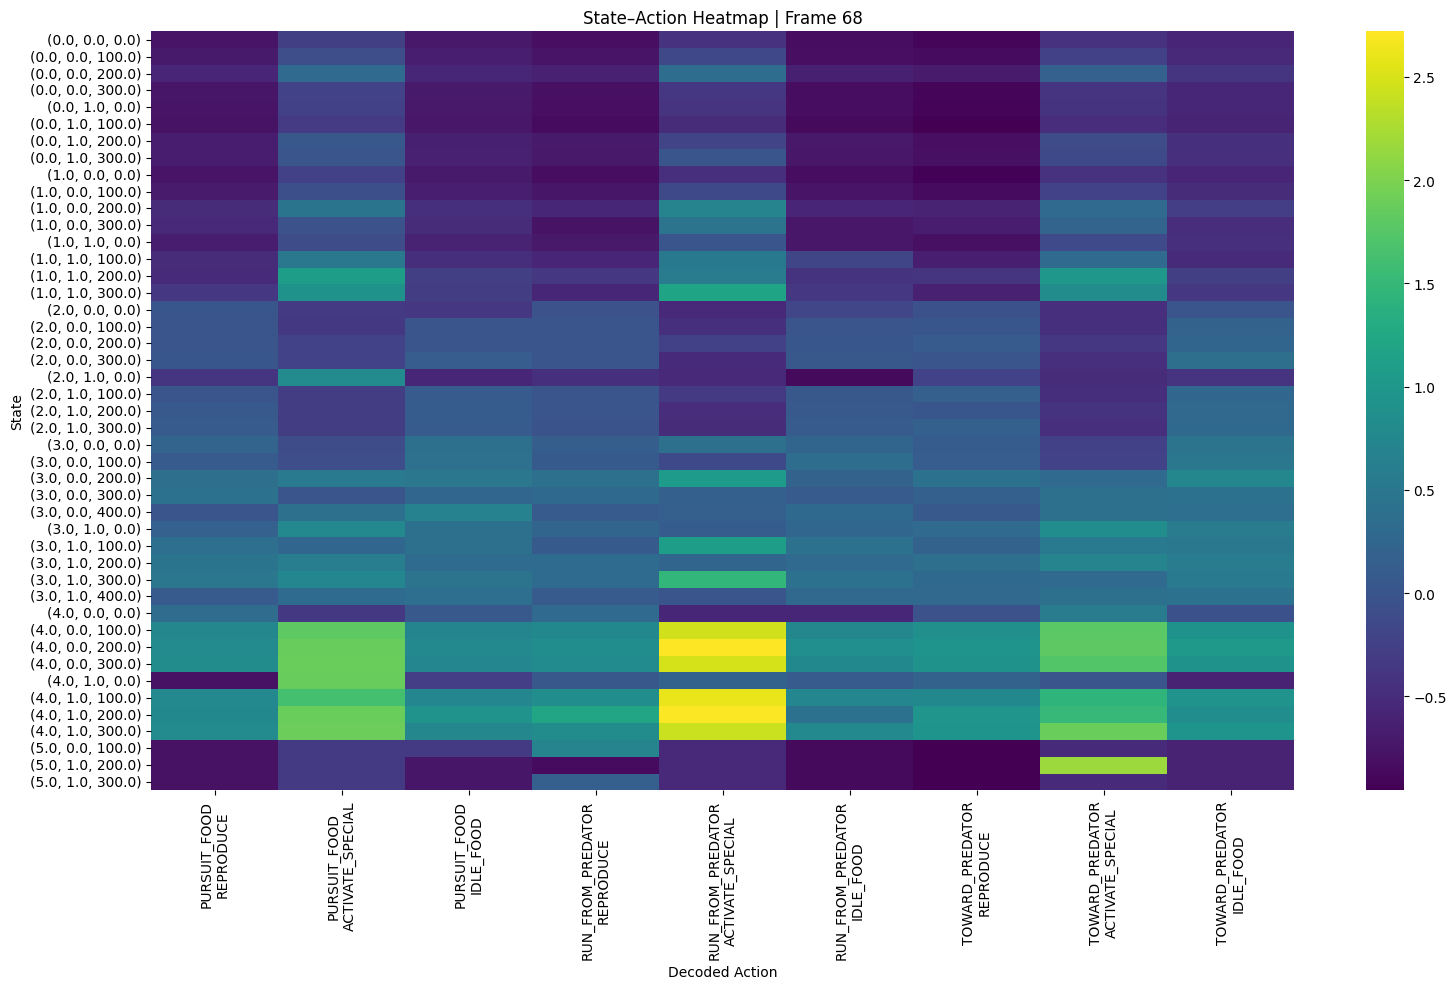

69


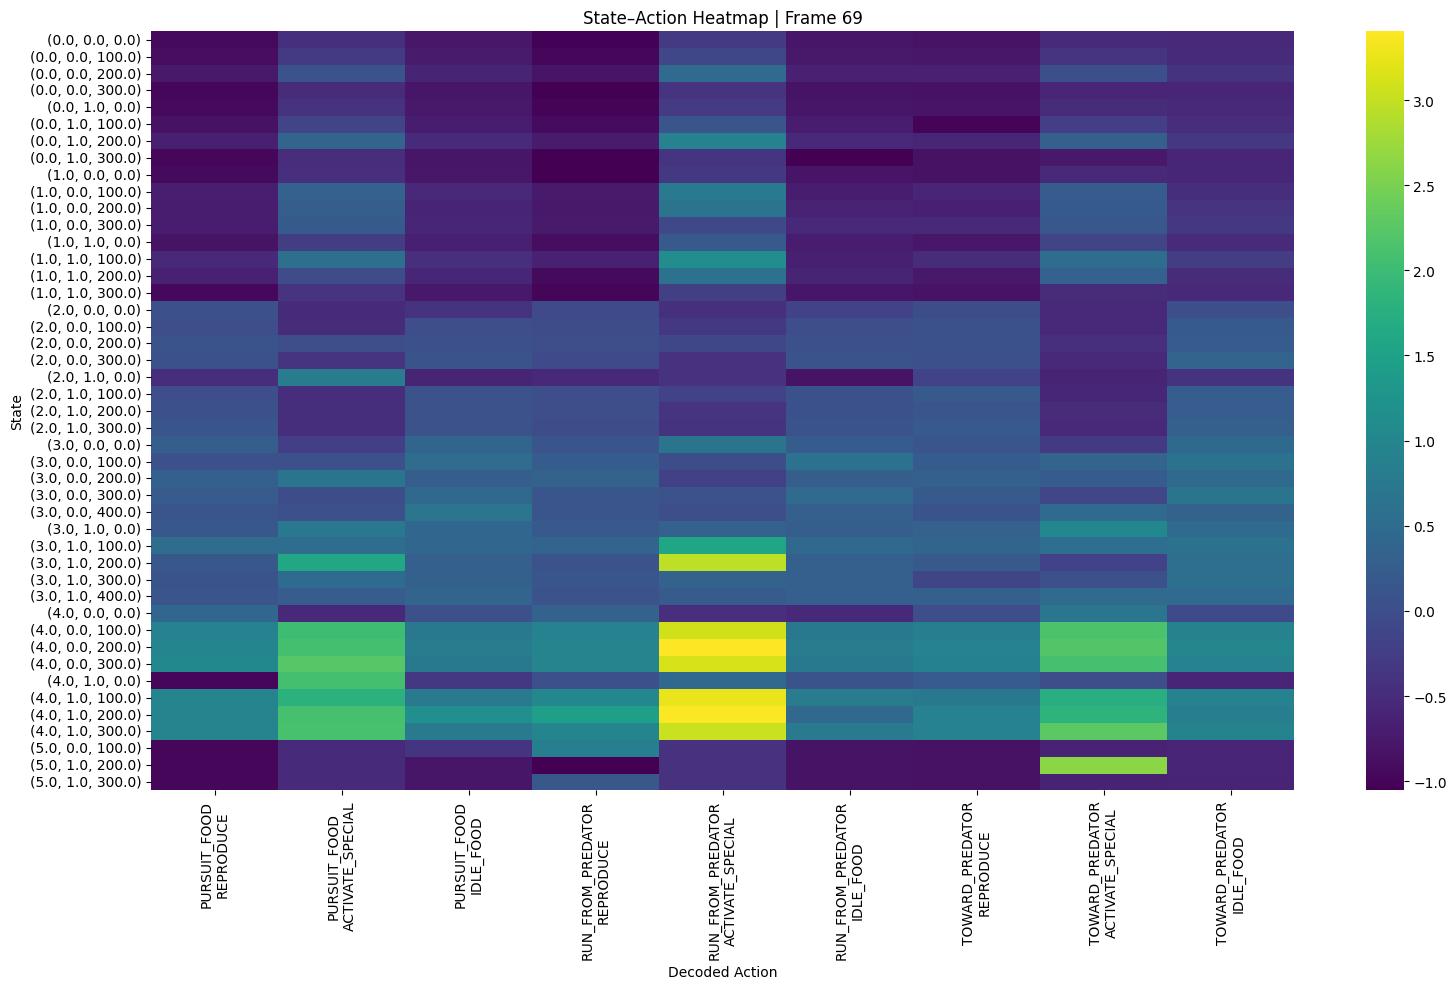

70


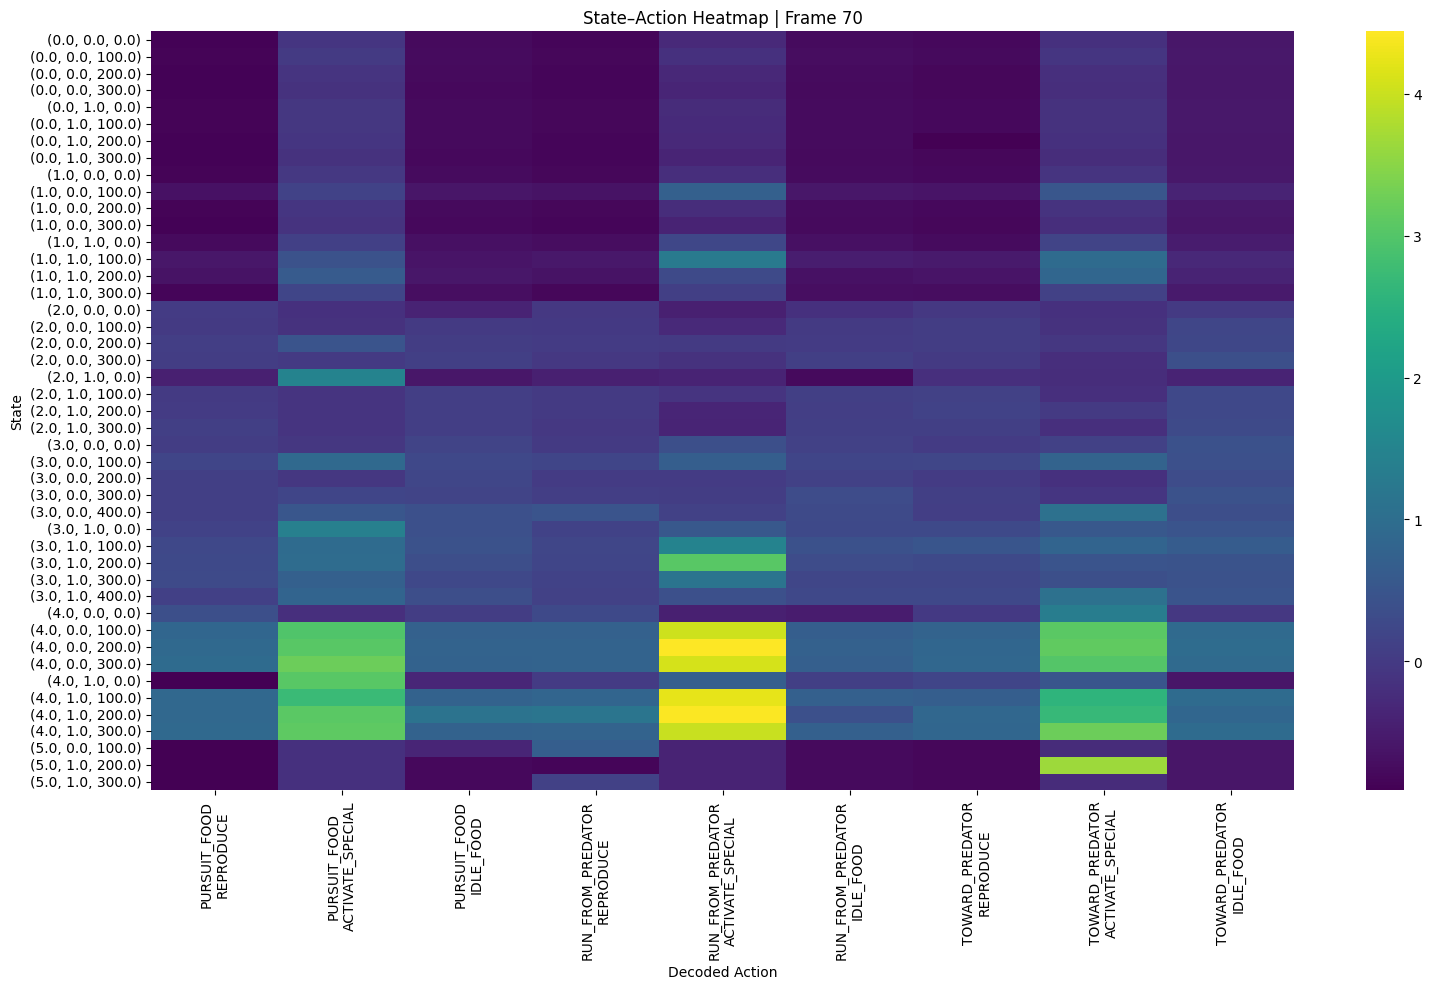

71


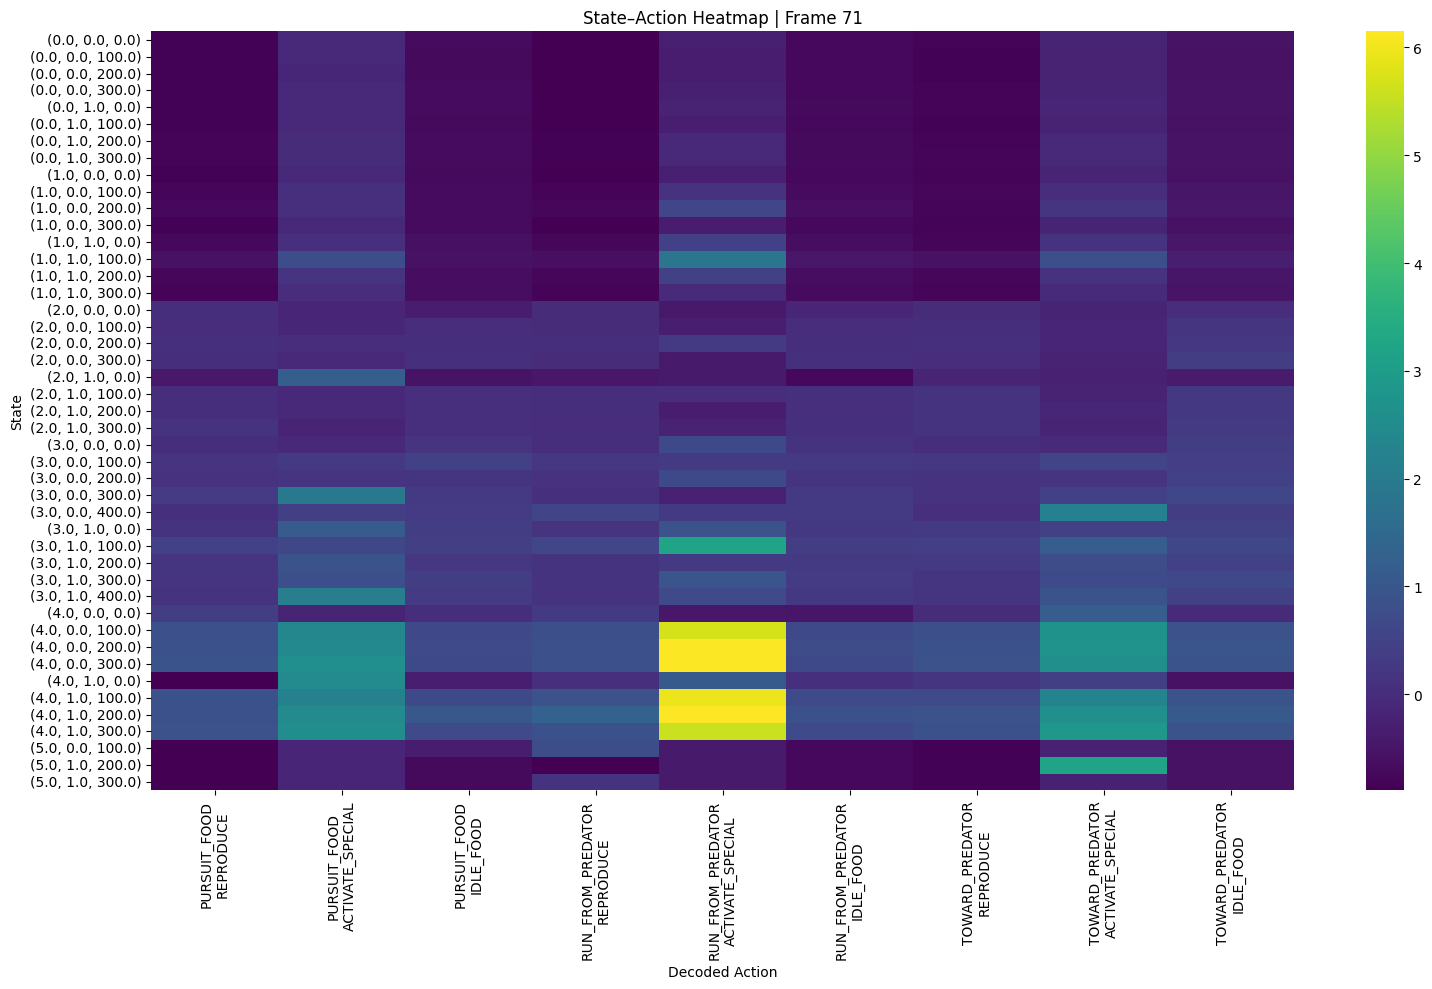

72


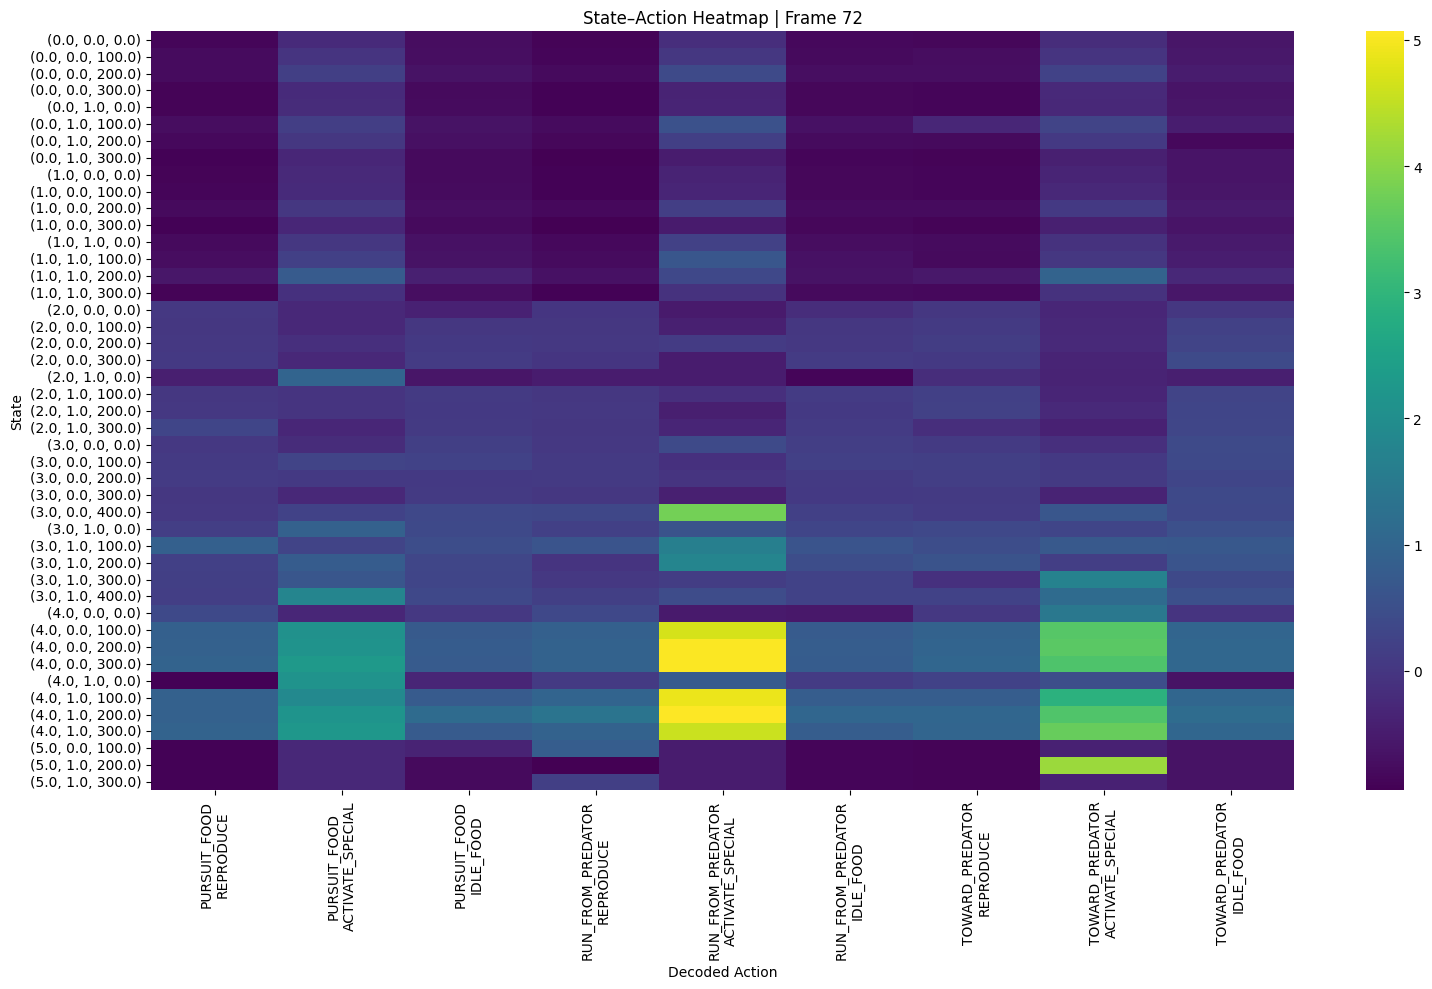

73


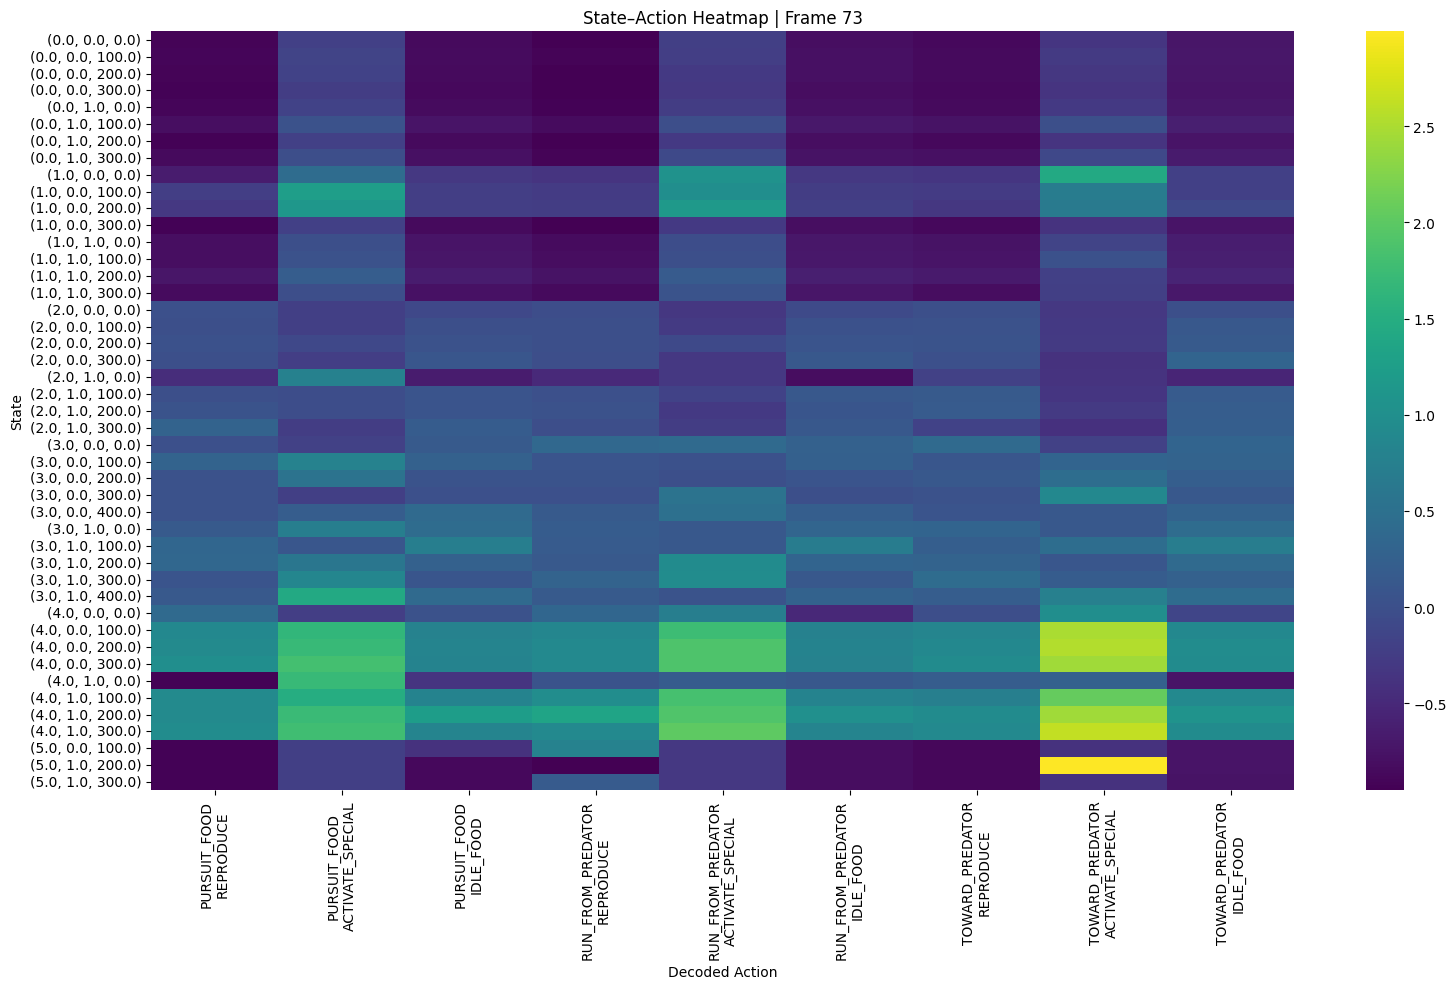

74


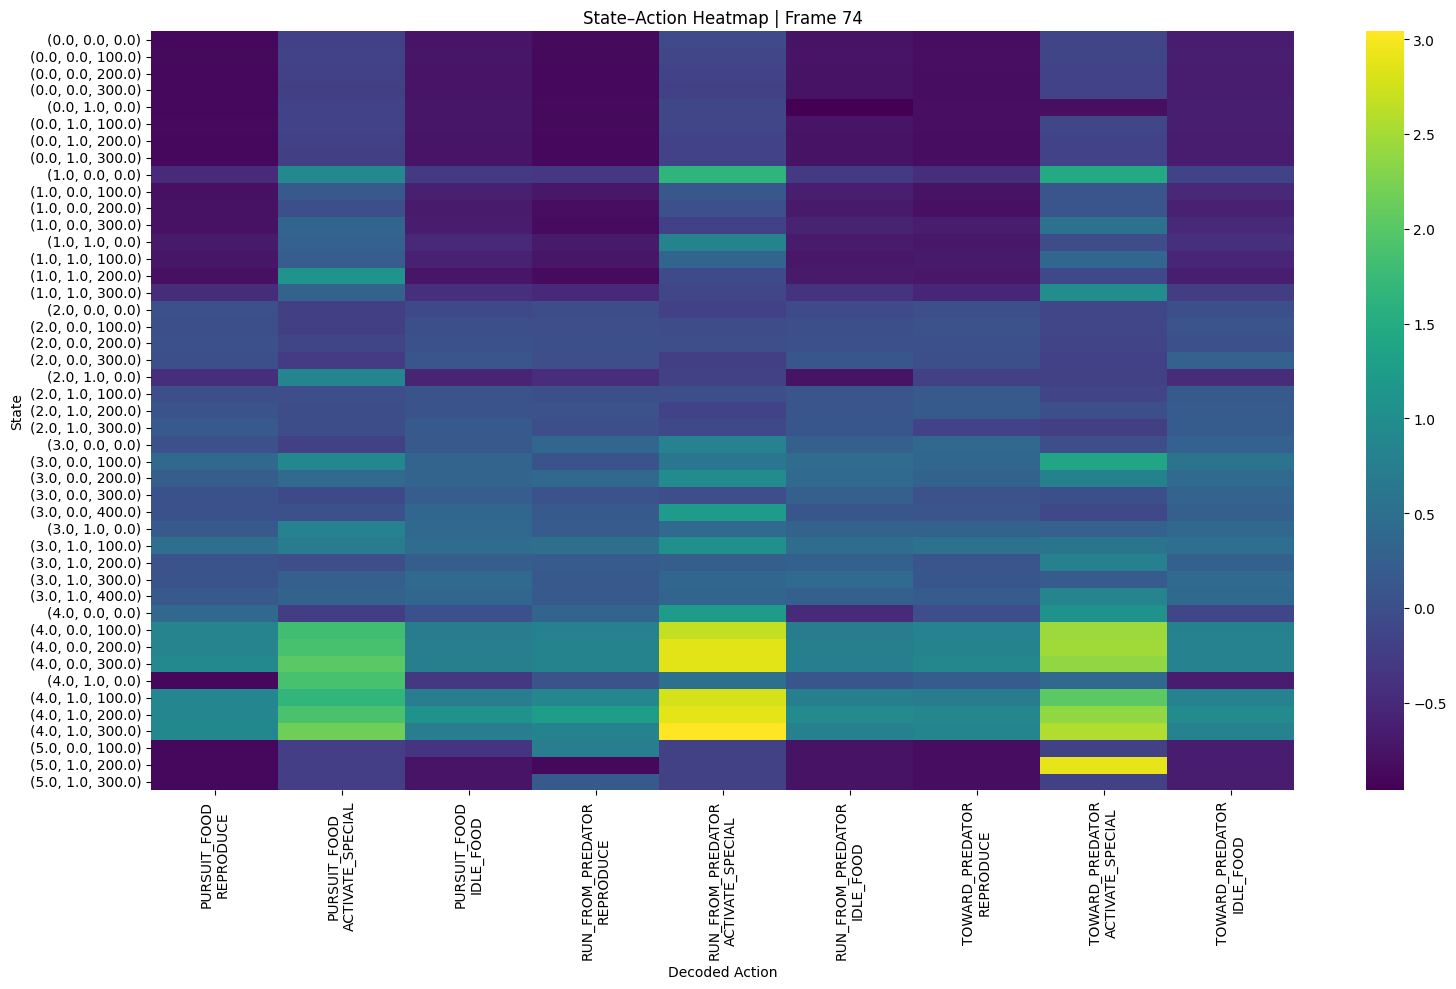

75


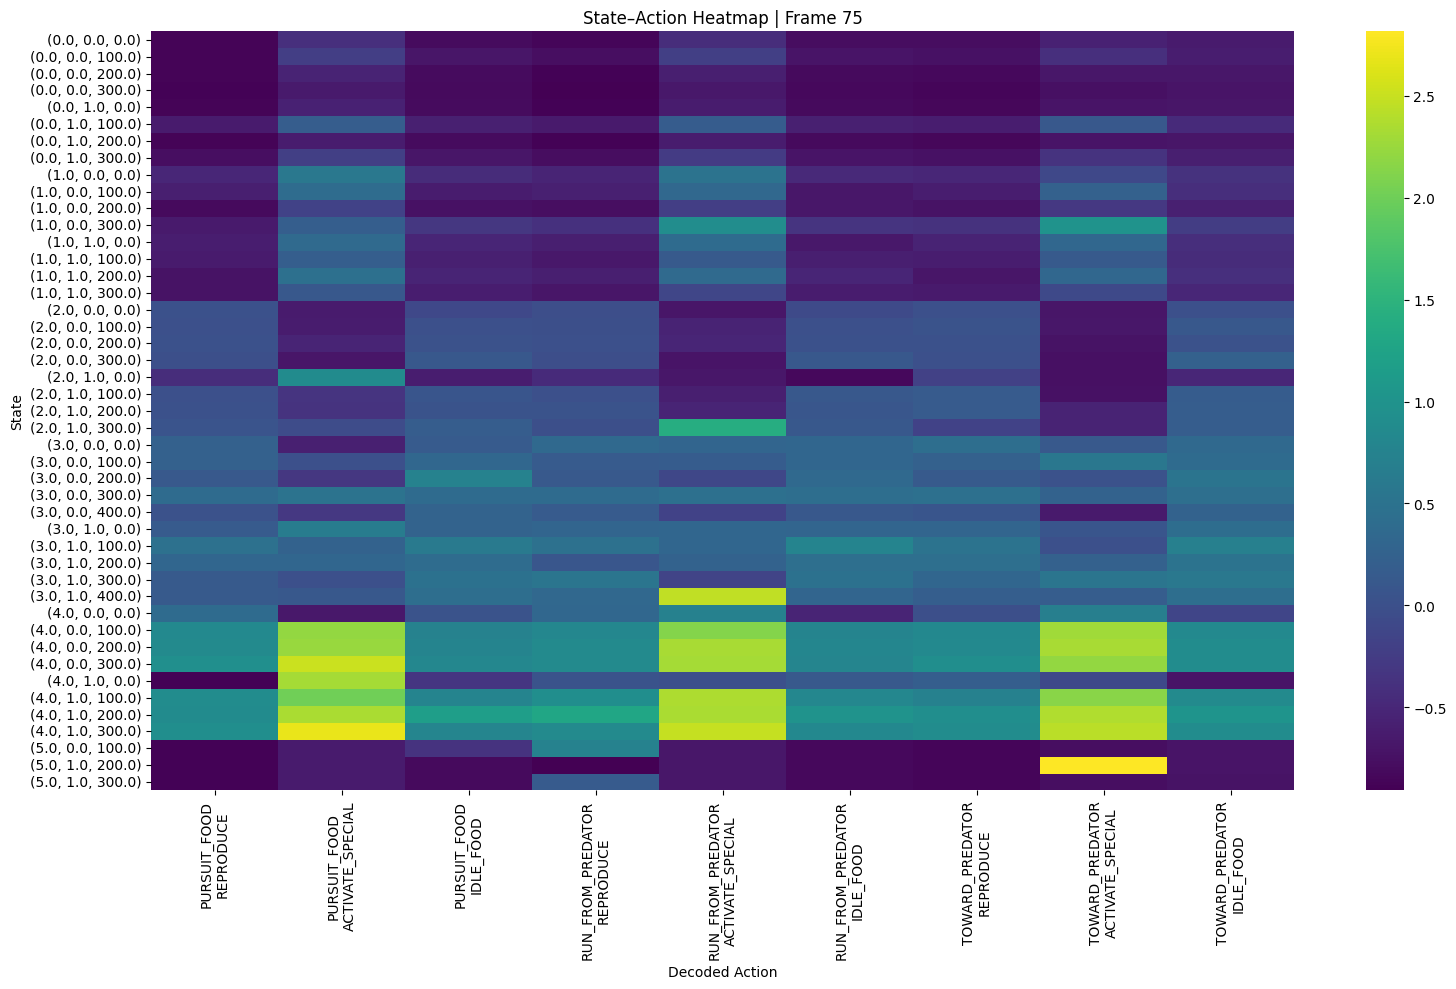

76


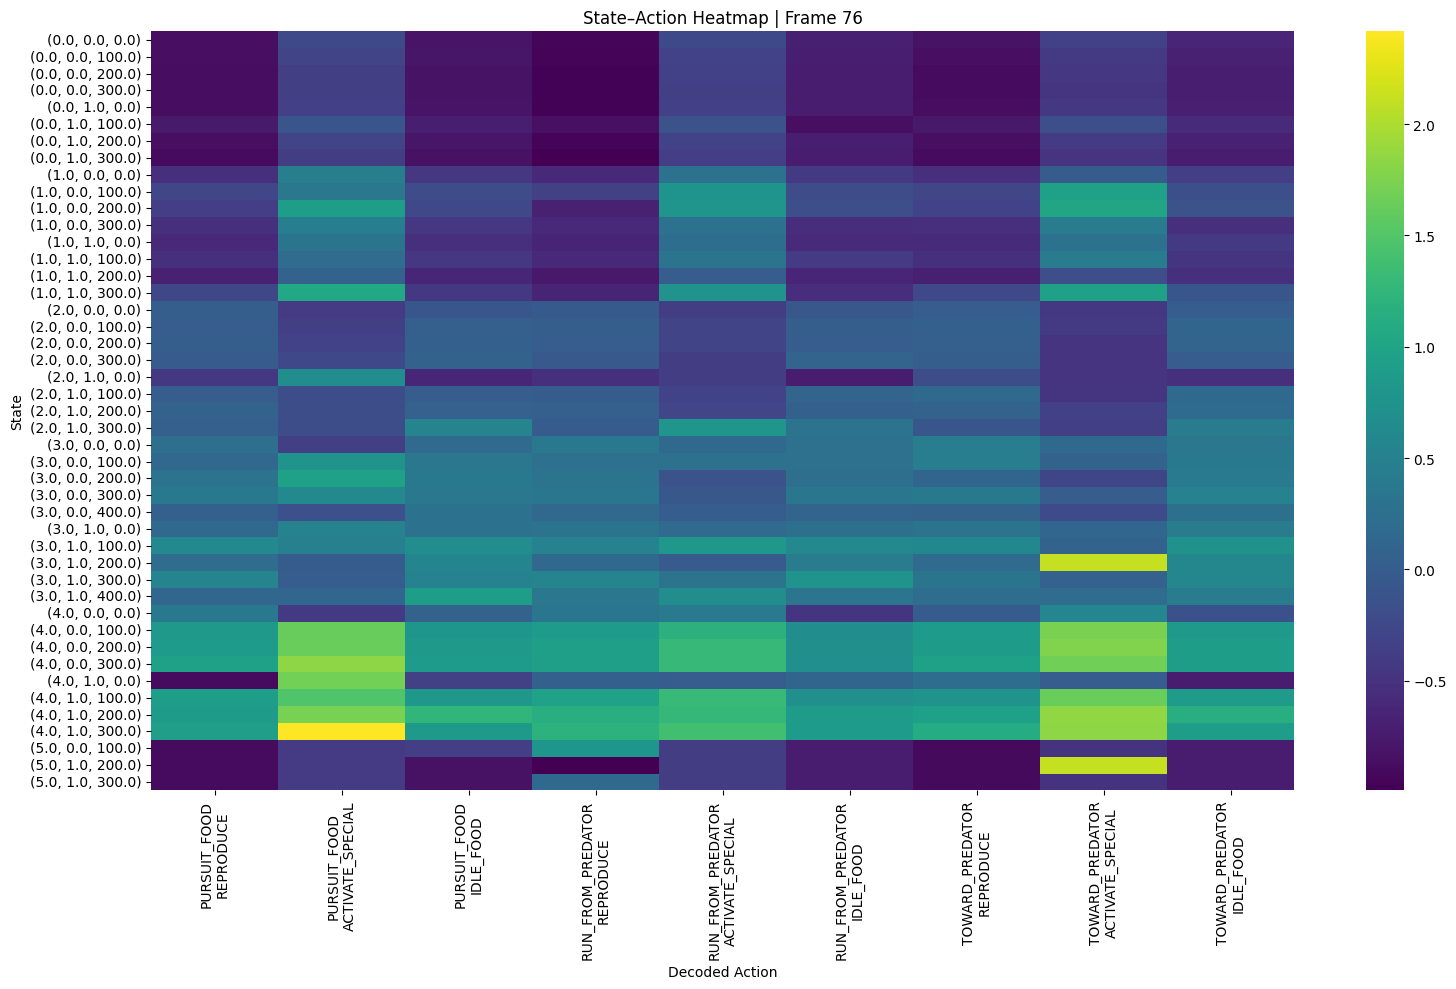

77


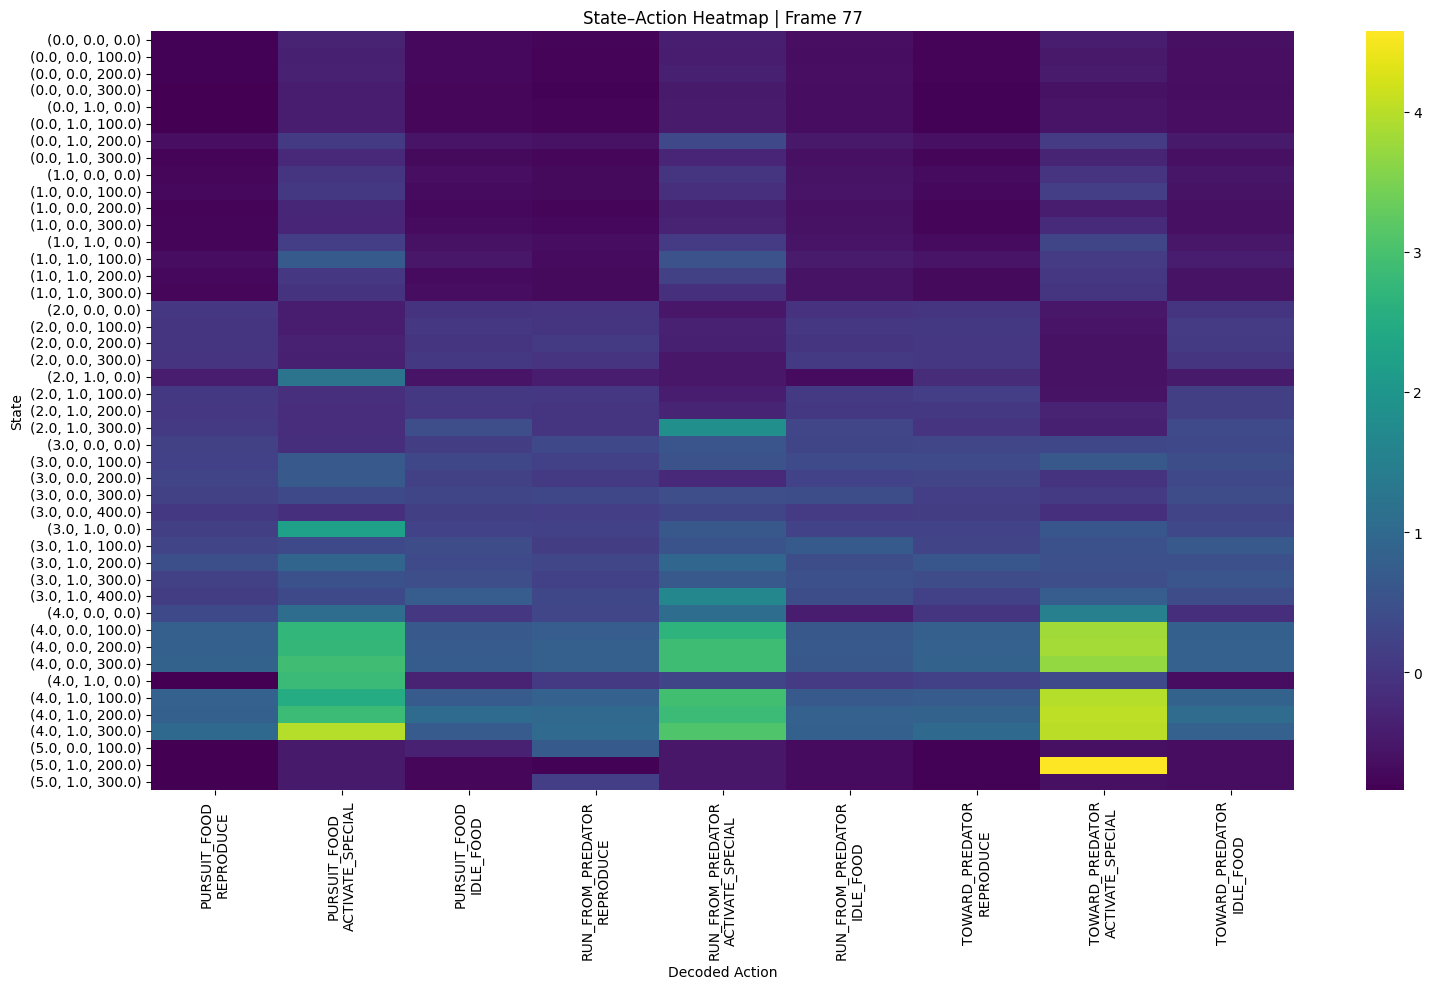

78


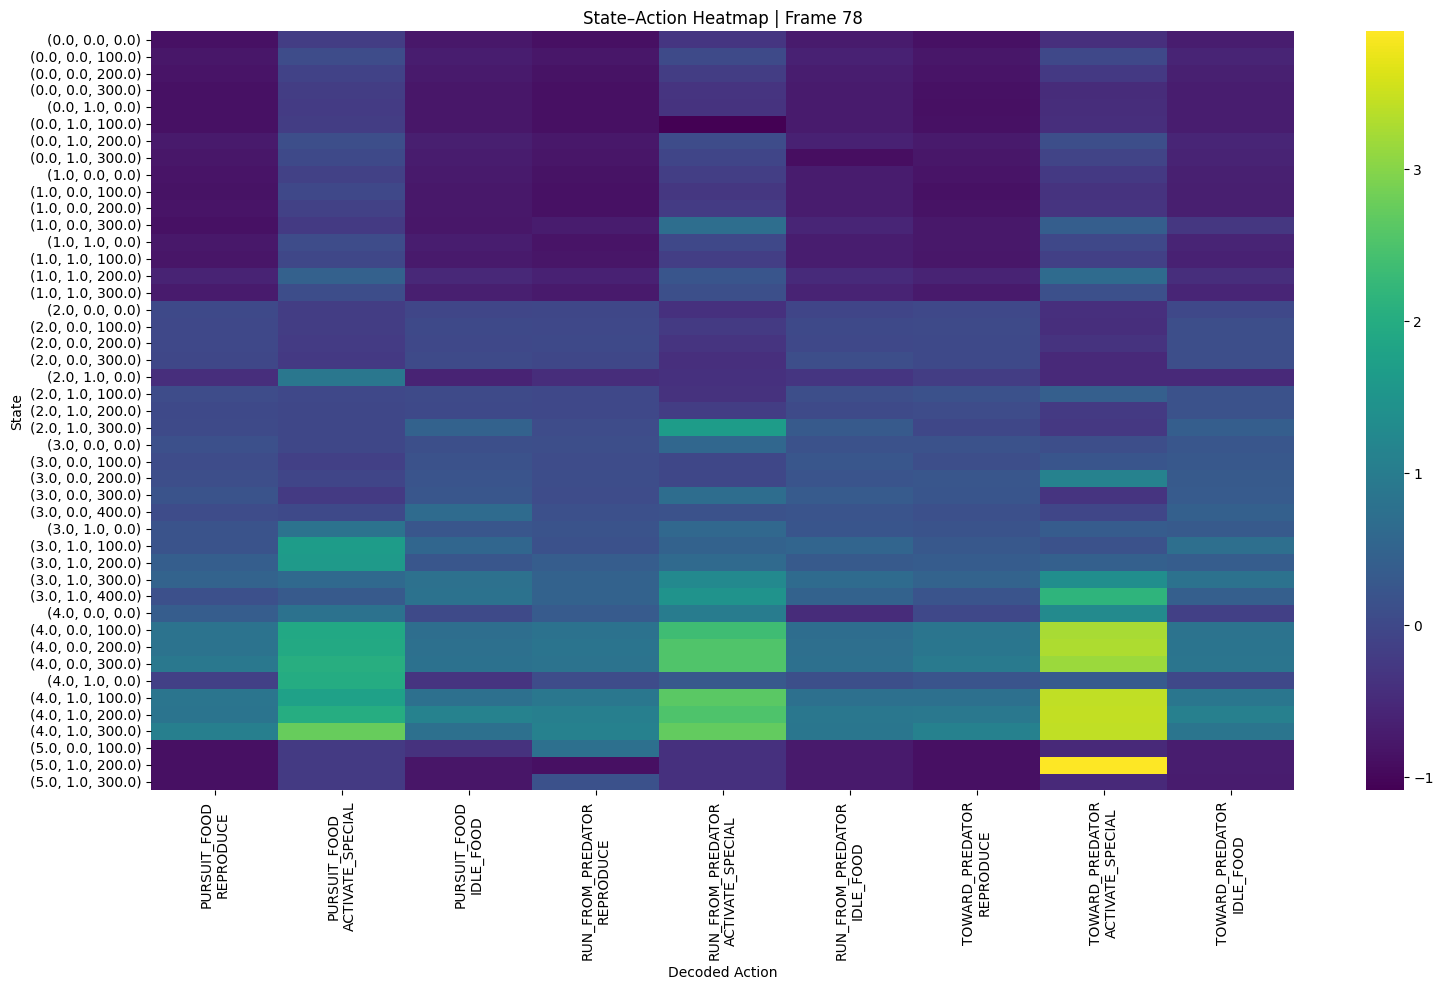

79


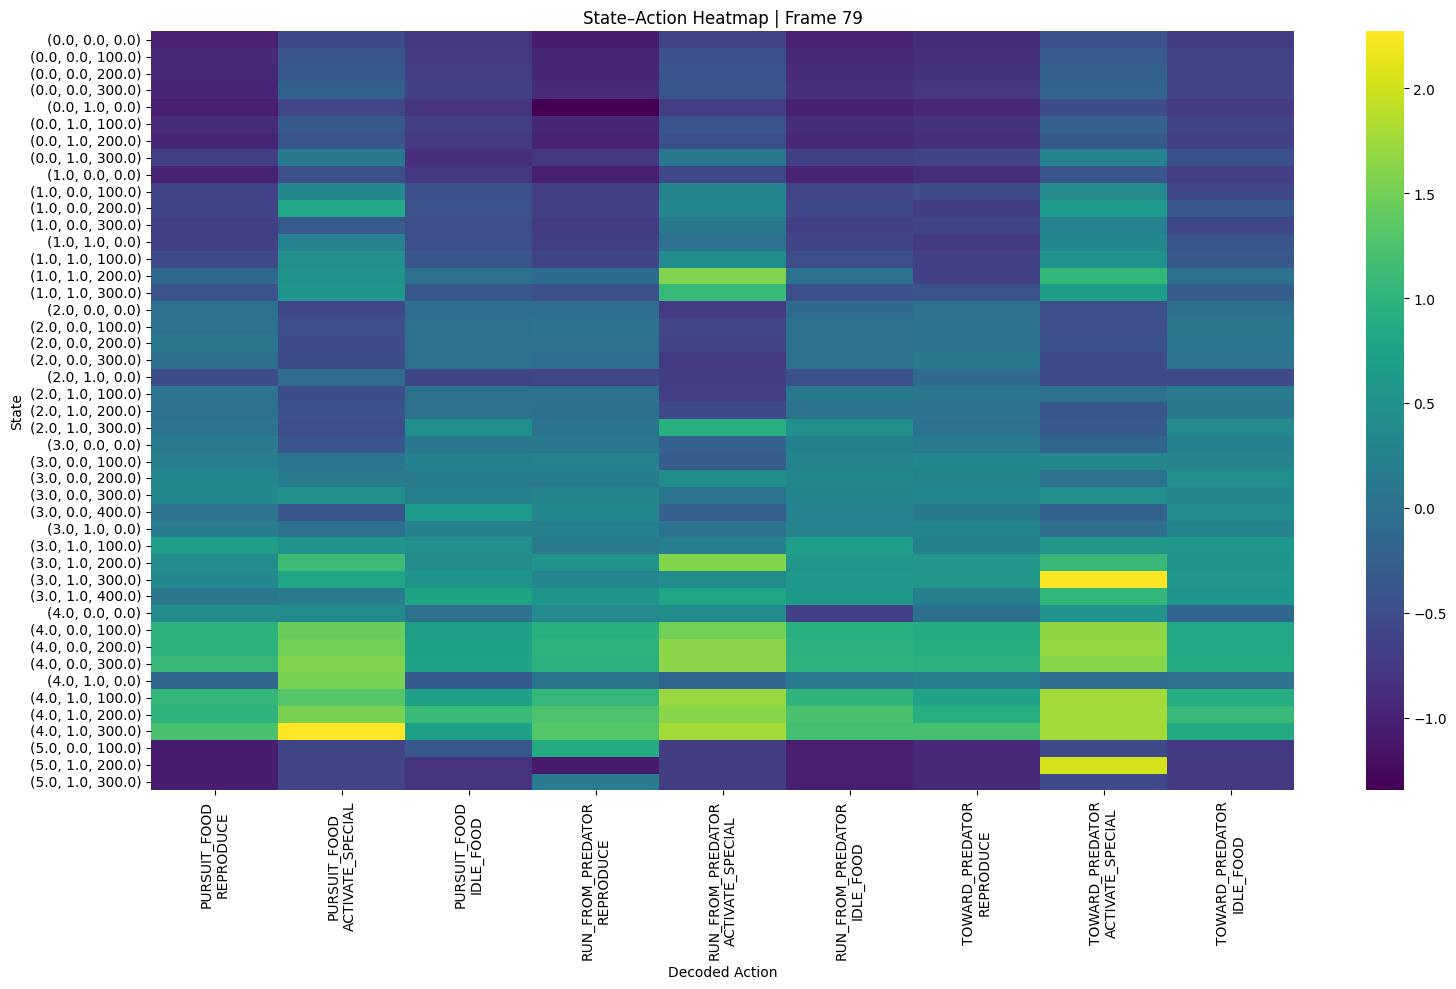

In [1826]:
plot_heatmap_actionprobs(df, frame_idx=1, show_numbers=False)  # first frame
plot_heatmap_actionprobs(df, frame_idx=len(df), show_numbers=False)  # last frame
for frame_idx in range(66,80):
    print(frame_idx)
    plot_heatmap_actionprobs(df, frame_idx=frame_idx, show_numbers=False)  # first frame
